## **2.1 Images**

2.1.1

In [ ]:
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

In [ ]:
MNIST_dataset = torchvision.datasets.MNIST("./", train=True, download = True)

In [ ]:
MNIST_dataset.train_data.shape

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [ ]:
MNIST_dataset.train_labels.shape

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])

In [ ]:
index = np.random.choice(60000,1000) 

In [ ]:
subset_images = MNIST_dataset.train_data[index,:,:]
subset_labels = MNIST_dataset.train_labels[index]

2.1.2

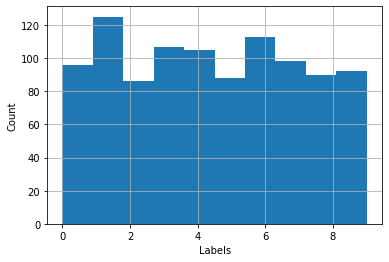

In [ ]:
plt.hist(subset_labels)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.grid(True)

2.1.3

In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.9 MB/s eta 0:00:00


In [ ]:
from einops import rearrange

In [ ]:
subset_images.shape

torch.Size([1000, 28, 28])

In [ ]:
rearrange(subset_images, '(b1 b2) h w -> b1 b2 1 h w', b2=25).shape
# b1 = 40, b2 =25, h = 28 w - 28

torch.Size([40, 25, 1, 28, 28])

In [ ]:
subset_images_batch = rearrange(subset_images, '(b1 b2) h w -> b1 b2 1 h w', b2=25)

In [ ]:
subset_images[0]

2.1.4

In [ ]:
import numpy as np
from tensorflow import keras

mnist = keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


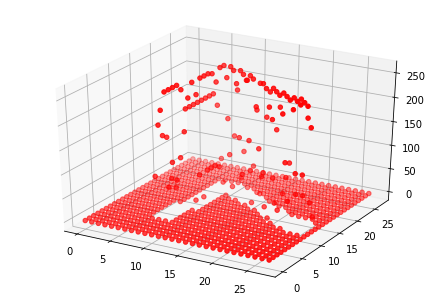

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

digit = x_test[0]

# Create 3D plot
fig = plt.figure()
ax = Axes3D(fig)

# Add the data points to the plot
x, y = np.indices(digit.shape)
ax.scatter(x, y, digit, c='r', marker='o')

# Show the plot
plt.show()

## **2.2 Time Series**

2.2.1

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
energy_data = pd.read_csv("energydata_complete.csv")

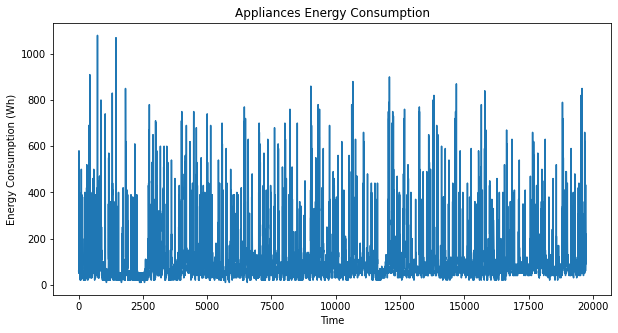

In [ ]:
# Plot the energy consumption for the whole period

plt.rcParams["figure.figsize"] = (10,5) 

plt.plot(energy_data['Appliances'])
plt.xlabel('Time') 
plt.ylabel('Energy Consumption (Wh)') 
plt.title('Appliances Energy Consumption') 
plt.show()

2.2.2

In [ ]:
energy_data['Appliances']

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64

In [ ]:
energy_data['date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [ ]:
energy_data['date'][0].split(" ")[0]

'2016-01-11'

In [ ]:
energy_data['date'][0].split(" ")[1]

'17:00:00'

In [ ]:
date.fromisoformat(energy_data['date'][0].split(" ")[0])

datetime.date(2016, 1, 11)

In [ ]:
energy_data['date'][0].split(" ")[1].split(":")

['17', '00', '00']

In [ ]:
appliance_data = np.zeros([24,7])

In [27]:
oldweekday = -1

for i in range(len(energy_data)):
  day = energy_data['date'][i].split(" ")[0]                   # date, ex) 2016-01-11
  day = date.fromisoformat(day)                                # change type (string -> date)  
  weekday = date.weekday(day)                                  # weekday / 0: Monday ~ 6:Sunday 
  hour = energy_data['date'][i].split(" ")[1].split(":")[0]    
  hour = int(hour)                                             # change type (string -> integer)  

  if oldweekday == 6 and weekday == 0:                         # to get 1 week
    break
 
  appliance_data[hour,weekday] += energy_data['Appliances'][i]

  oldweekday = weekday

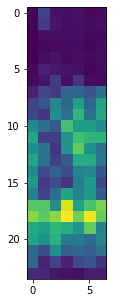

In [28]:
fig, ax = plt.subplots()
im = ax.imshow(appliance_data)

2.2.3

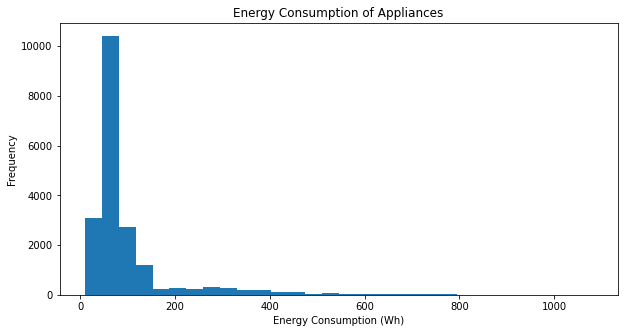

In [ ]:
plt.hist(energy_data['Appliances'], bins=30) 
plt.xlabel('Energy Consumption (Wh)') 
plt.ylabel('Frequency') 
plt.title('Energy Consumption of Appliances')
plt.show()

2.2.4

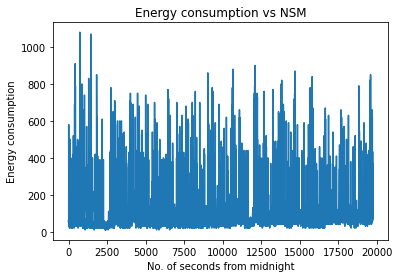

In [ ]:
df = pd.read_csv('energydata_complete.csv')

# Create NSM (no. of seconds from midnight) feature
df['NSM'] = df.index

# Plot energy consumption vs. NSM
plt.plot(df['NSM'], df['Appliances'])
plt.xlabel('No. of seconds from midnight')
plt.ylabel('Energy consumption')
plt.title('Energy consumption vs NSM')
plt.show()

2.2.5

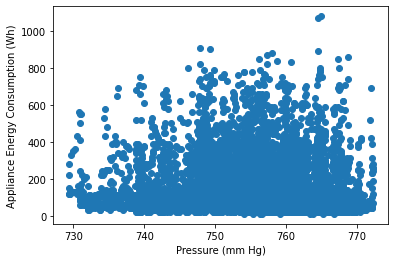

In [ ]:
plt.scatter(df['Press_mm_hg'], df['Appliances'])

# Set labels
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Appliance Energy Consumption (Wh)')

# Show plot
plt.show()

**2.2.6**

From the scatter plot, it can be observed that there is no obvious meaningful relationship between the levels of energy consumption and either of Press_mm_hg or NSM. On 2.2.5 part, as energy pressure increases, consumption increases in some part. But it's not the major contrubuting factor for the energy consumption. we can also observe that there is an overall increase in the energy consumption around midnight.

## 2.3

In [ ]:
data = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None, names=["Frequency", "Angle of Attack", "Chord Length", "Free-stream Velocity", "Suction Side Displacement Thickness", "Scaled Sound Pressure Level"])
print(data)

      Frequency  Angle of Attack  Chord Length  Free-stream Velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

      Suction Side Displacement Thickness  Scaled Sound Pressure Level  
0                                0.002663                     

In [ ]:
mean = data.mean()
print("**mean**")
print(mean)

#calculating the variance
variance = data.var()
print("\n**variance**")
print(variance)

#calculating the median
median = data.median()
print("\n**median**")
print(median)

#calculating the kurtosis
kurtosis = data.kurtosis()
print("\n**kurtosis**")
print(kurtosis)

#calculating the skewness
skewness = data.skew()
print("\n**skewness**")
print(skewness)

#calculating the range
range = data.max() - data.min()
print("\n**range**")
print(range)

**mean**
Frequency                              2886.380572
Angle of Attack                           6.782302
Chord Length                              0.136548
Free-stream Velocity                     50.860745
Suction Side Displacement Thickness       0.011140
Scaled Sound Pressure Level             124.835943
dtype: float64

**variance**
Frequency                              9.938717e+06
Angle of Attack                        3.502424e+01
Chord Length                           8.749868e-03
Free-stream Velocity                   2.425116e+02
Suction Side Displacement Thickness    1.729287e-04
Scaled Sound Pressure Level            4.759146e+01
dtype: float64

**median**
Frequency                              1600.000000
Angle of Attack                           5.400000
Chord Length                              0.101600
Free-stream Velocity                     39.600000
Suction Side Displacement Thickness       0.004957
Scaled Sound Pressure Level             125.721000
dtype: floa